# Big Data for Health (CSE6250) 

Goal: Using Support Vector Machine model to predict sepsis onset using MIMIC III Data

Author: Caleb Sabatini

In [1]:
from Python.model_data import model_data
from Python.utils import classification_metrics, plot_roc, plot_prc

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tempfile import mkdtemp

Train/Test data size: 4885/543
Best CV score: 0.6940562617307324
Best parameters: {'clf__C': 1000.0, 'clf__gamma': 'auto'}
______________________________________________
Classifier: SVM
Accuracy:  0.8821
AUC:  0.7799
AUPRC:  0.3174
Precision:  0.0000
Recall:  0.0000
F1-score:  0.0000
______________________________________________



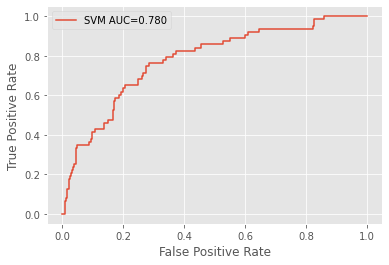

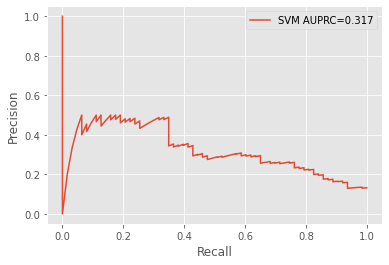

In [2]:
df_train, df_test = model_data(model_type="SVM", test_size=.1)

x_train, y_train = df_train.drop(columns=['label', 'icustay_id']), df_train['label']
x_test, y_test = df_test.drop(columns=['label', 'icustay_id']), df_test['label']

# define pipeline
cachedir = mkdtemp()
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=0))
], memory=cachedir)

# 5-fold grid search cv
param_grid = {"clf__C": np.logspace(-4, 4, 9), "clf__gamma": ['scale', 'auto']}
grid_search = GridSearchCV(pipe, param_grid, n_jobs=10, cv=5, scoring="roc_auc")
grid_search.fit(x_train, y_train) 
best_params = grid_search.best_params_

print("Best CV score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

# evaluate on test data
y_pred = grid_search.best_estimator_.predict_proba(x_test)[:,1]

# summary and plots
classification_metrics("SVM", y_test, y_pred)
plot_roc(figname="output/SVM_roc.png", SVM="output/SVM_roc.csv")
plot_prc(figname="output/SVM_prc.png", SVM="output/SVM_prc.csv")